<a href="https://colab.research.google.com/github/yashpickles/Death-By-Boredom/blob/master/Stock_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Price Predictor**
### **-Yash Acharya**

## **Importing the Libraries**

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

## **Importing the Dataset**

In [56]:
dataset = pd.read_csv('Microsoft_Stock_share.csv')

In [57]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-13,216.360001,217.419998,214.160004,216.509995,215.944641,18621100
1,2020-11-16,214.869995,217.740005,214.520004,217.229996,216.662766,24953300
2,2020-11-17,216.100006,217.679993,214.080002,214.460007,213.900009,24154100
3,2020-11-18,213.649994,215.169998,210.929993,211.080002,211.080002,28372800
4,2020-11-19,211.380005,213.029999,209.929993,212.419998,212.419998,24792700


In [58]:
dataset.shape

(58, 7)

## **Miscellaneous**

In [59]:
company = 'MSFT'

In [60]:
Prediction_days = 50

## **Feature Scalling**

In [61]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler(feature_range = (0, 1))
Scaled_data = Scaler.fit_transform(dataset['Close'].values.reshape(-1, 1))

In [62]:
print(Scaled_data)

[[0.19458784]
 [0.21647903]
 [0.13225923]
 [0.02949228]
 [0.07023404]
 [0.00851319]
 [0.        ]
 [0.11401642]
 [0.1143203 ]
 [0.15567027]
 [0.12040154]
 [0.1854669 ]
 [0.15992687]
 [0.12557023]
 [0.12921861]
 [0.12709008]
 [0.17938565]
 [0.05138347]
 [0.01246591]
 [0.09577361]
 [0.1243538 ]
 [0.12222573]
 [0.2788081 ]
 [0.28306469]
 [0.257829  ]
 [0.37944652]
 [0.42049261]
 [0.33171188]
 [0.38431133]
 [0.45150521]
 [0.42687727]
 [0.35177842]
 [0.37427783]
 [0.23046525]
 [0.23684991]
 [0.06506535]
 [0.2487076 ]
 [0.28914548]
 [0.22438446]
 [0.14654886]
 [0.18941915]
 [0.08847685]
 [0.07722692]
 [0.19245977]
 [0.43265418]
 [0.45180909]
 [0.48160525]
 [0.59045298]
 [0.67558533]
 [0.69291559]
 [0.87625396]
 [0.66433586]
 [0.89814515]
 [0.89388855]
 [1.        ]
 [0.9698995 ]
 [0.9756764 ]
 [0.98388572]]


In [63]:
print(dataset)

          Date        Open        High  ...       Close   Adj Close    Volume
0   2020-11-13  216.360001  217.419998  ...  216.509995  215.944641  18621100
1   2020-11-16  214.869995  217.740005  ...  217.229996  216.662766  24953300
2   2020-11-17  216.100006  217.679993  ...  214.460007  213.900009  24154100
3   2020-11-18  213.649994  215.169998  ...  211.080002  211.080002  28372800
4   2020-11-19  211.380005  213.029999  ...  212.419998  212.419998  24792700
5   2020-11-20  212.199997  213.289993  ...  210.389999  210.389999  22843100
6   2020-11-23  210.949997  212.289993  ...  210.110001  210.110001  25683500
7   2020-11-24  209.589996  214.250000  ...  213.860001  213.860001  33979700
8   2020-11-25  215.110001  215.289993  ...  213.869995  213.869995  21012900
9   2020-11-27  214.850006  216.270004  ...  215.229996  215.229996  14512200
10  2020-11-30  214.100006  214.759995  ...  214.070007  214.070007  33064800
11  2020-12-01  214.509995  217.320007  ...  216.210007  216.210

## **Creating Training set**

In [64]:
X_train = []

In [65]:
y_train = []

In [66]:
for x in range(Prediction_days, len(Scaled_data)):
  X_train.append(Scaled_data[x-Prediction_days:x, 0])
  y_train.append(Scaled_data[x, 0])

In [67]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [68]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## **Building the LSTM Model**

## **a) Initializing the Model**

In [69]:
import tensorflow as tf
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
lstm = tf.keras.models.Sequential()

##**b) LSTM**

In [70]:
lstm.add(LSTM(units=40, return_sequences=True, input_shape=(X_train.shape[1], 1)))

In [71]:
lstm.add(Dropout(0.2))

In [72]:
lstm.add(LSTM(units=40, return_sequences=True))

In [73]:
lstm.add(Dropout(0.2))

In [74]:
lstm.add(LSTM(units =40))

In [75]:
lstm.add(Dropout(0.2))

## **c) Output Layer**

In [76]:
lstm.add(Dense(units=1))

## **d) Training the LSTM**

In [77]:
lstm.compile(optimizer='adam', loss='mean_squared_error')

## **e) Training the LSTM on the Training set**

In [78]:
lstm.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 0.7777
Epoch 2/50
1/1 [==============================] - 0s 59ms/step - loss: 0.6859
Epoch 3/50
1/1 [==============================] - 0s 57ms/step - loss: 0.6065
Epoch 4/50
1/1 [==============================] - 0s 57ms/step - loss: 0.5610
Epoch 5/50
1/1 [==============================] - 0s 58ms/step - loss: 0.4739
Epoch 6/50
1/1 [==============================] - 0s 69ms/step - loss: 0.3865
Epoch 7/50
1/1 [==============================] - 0s 63ms/step - loss: 0.2558
Epoch 8/50
1/1 [==============================] - 0s 63ms/step - loss: 0.1882
Epoch 9/50
1/1 [==============================] - 0s 60ms/step - loss: 0.0923
Epoch 10/50
1/1 [==============================] - 0s 63ms/step - loss: 0.0209
Epoch 11/50
1/1 [==============================] - 0s 62ms/step - loss: 0.0182
Epoch 12/50
1/1 [==============================] - 0s 61ms/step - loss: 0.1672
Epoch 13/50
1/1 [==============================] - 0s 60ms/step

## **Loading the Test Data**

In [79]:
test_start = dt.datetime(2020,11,30)
test_end = dt.datetime.now()

In [81]:
test_dataset = web.DataReader(company, 'yahoo', test_start, test_end )

In [82]:
actual_prices = test_dataset['Close'].values
total_dataset = pd.concat((dataset['Close'], test_dataset['Close']), axis=0)
model_input = total_dataset[len(total_dataset) - len(test_dataset) - Prediction_days:].values

In [83]:
model_input = model_input.reshape(-1, 1)
model_input = Scaler.transform(model_input) 

## **Predicitng the Test Set**

In [86]:
X_test = []
for x in range(Prediction_days, len(model_input)):
  X_test.append(model_input[x-Prediction_days:x, 0])

In [87]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [89]:
predicted_prices = lstm.predict(X_test)
predicted_prices = Scaler.inverse_transform(predicted_prices)

## **Plotting the Test Prediction**

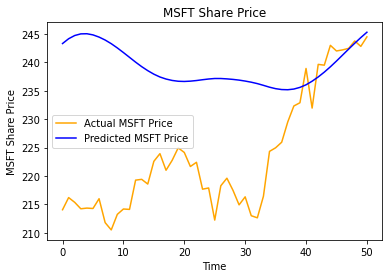

In [90]:
plt.plot(actual_prices, color='orange', label = f"Actual {company} Price")
plt.plot(predicted_prices, color='blue', label = f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()

## **Predict the Next Day**

In [91]:
real_data = [model_input[len(model_input) + 1 - Prediction_days:len(model_input+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))


In [92]:
prediction = lstm.predict(real_data)
prediction = Scaler.inverse_transform(prediction)

In [93]:
print(f"prediction: {prediction}")

prediction: [[246.19585]]
